# Imports

In [1]:
import pandas as pd

from sklearn.metrics import log_loss 

import pycaret.regression as pr

from controller import Controller

In [2]:
c = Controller('i02')

cols_to_drop = [
    'PROJECT_ID',
    'TRAIN_VAL_TEST_SPLIT',
    'DEADLINE',
    'STATE_CHANGED_AT',
    'CREATED_AT',
    'LAUNCHED_AT',
    'KEYWORDS',
    
    'DESC',
    'NAME',
    'FINAL_STATUS',
]

# Load data

In [3]:
filepath = fr'{c.get_path_data_prepared()}/01_df_development.pkl'
df_development = pd.read_pickle(filepath)
df_development = df_development.drop(cols_to_drop, axis=1)
df_development

,GOAL,DISABLE_COMMUNICATION,COUNTRY,CURRENCY,BACKERS_COUNT,CREATE_LAUNCH_HOURS,CREATE_LAUNCH_HOURS_LOG,CREATE_DEADLINE_HOURS,CREATE_DEADLINE_HOURS_LOG,LAUNCHED_DEADLINE_HOURS
0,60000.0,False,US,USD,4,2375.831389,7.773524,3095.831389,8.038135,720.000000
1,800.0,False,US,USD,41,119.452500,4.791255,1400.657500,7.245411,1281.205000
2,10000.0,False,US,USD,1,6345.470556,8.755654,7185.470556,8.879955,840.000000
3,270.0,False,GB,GBP,0,0.920833,0.652759,192.920833,5.267450,192.000000
4,5.0,False,GB,GBP,0,823.233611,6.714454,1544.233611,7.342930,721.000000
...,...,...,...,...,...,...,...,...,...,...
108124,250.0,False,US,USD,24,835.094444,6.728742,1373.173056,7.225607,538.078611
108125,5000.0,False,US,USD,0,285.817778,5.658847,1005.817778,6.914550,720.000000
108126,45000.0,False,CA,CAD,36,310.938611,5.742806,1030.938611,6.939194,720.000000
108127,3000.0,False,US,USD,0,152.635278,5.034581,873.635278,6.773807,721.000000


# Analyze `BACKERS_COUNT`

<Axes: ylabel='Frequency'>

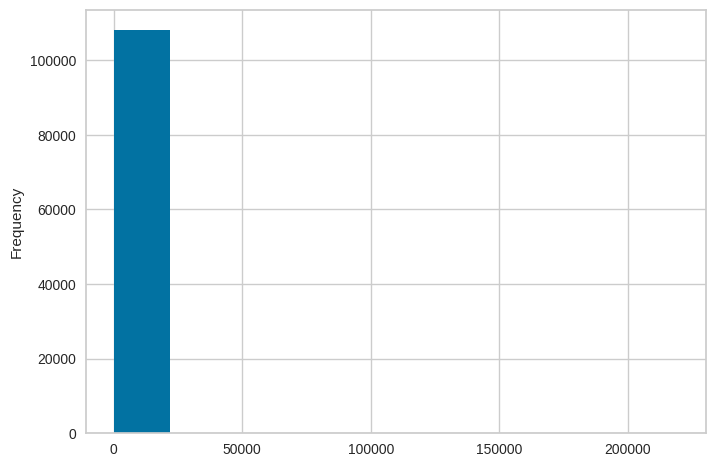

In [4]:
import matplotlib.pyplot as plt
df_development['BACKERS_COUNT'].plot(kind='hist')

# Run PyCaret

In [ ]:
s1 = setup(data=df_development, train_size=0.8, target='FINAL_STATUS', session_id=42)

In [ ]:
remove_metric('Kappa')
remove_metric('Accuracy')
add_metric('logloss', 'Log Loss', log_loss, greater_is_better=False)
get_metrics()

In [ ]:
best = compare_models(sort='MCC', n_select=10)

In [ ]:
best

# Evaluate models

## Bag top 3 models

In [ ]:
tuned_top = [tune_model(i, optimize='MCC') for i in best[:4]]

## Find best overall model

In [ ]:
blender = blend_models(tuned_top, optimize='MCC')
stacker = stack_models(tuned_top, optimize='MCC')
best_overall_model = automl(optimize='MCC')

# Hard Voting Classifier, i.e. majority wins
best_overall_model

In [ ]:
predict_holdout = predict_model(best_overall_model)
predict_holdout

In [ ]:
plot_model(best_overall_model, plot='confusion_matrix')

In [ ]:
plot_model(best_overall_model, plot='class_report')

In [ ]:
plot_model(best_overall_model, plot='error')

## Single best  model

In [ ]:
best[0]

In [ ]:
lgbm_tuned = tune_model(best[0], optimize='MCC')

# Saving to files

In [ ]:
filename = fr'{c.get_path_iteration()}/pycaret_best_single_model'
save_model(lgbm_tuned, filename)

In [ ]:
filename = fr'{c.get_path_iteration()}/pycaret_best_overall_model'
save_model(best_overall_model, filename)